In [1]:
import sys
import numpy             as     np
import pylab             as     pl
import astropy.io.fits   as     fits
import matplotlib        as     mpl
import matplotlib.pyplot as     plt

from   astropy.table     import Table
from   matplotlib.pyplot import figure

In [2]:
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/lumfn/')
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/')

In [3]:
from   SV3.define_sample import define_sample
from   params            import params

In [4]:
version = 0.3

In [5]:
reachable = Table.read('/global/cscratch1/sd/mjwilson/desi/BGS/lumfn/bright_reachable_sv3_v{:.1f}.fits'.format(version))
reachable

RA,DEC,REF_EPOCH,PARALLAX,PMRA,PMDEC,TARGETID,SUBPRIORITY,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,NUMOBS_MORE,NUMOBS,ZWARN_MTL,ZTILEID,TARGET_STATE,TIMESTAMP,VERSION,LOCATION,TILEID,TILELOCID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,FIBER,FIBERSTATUS,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,PRIORITY,DELTA_X,DELTA_Y,EXPTIME,PSF_TO_FIBER_SPECFLUX,NIGHT,EXPID,MJD,INTEG_COADD_FLUX_B,MEDIAN_COADD_FLUX_B,MEDIAN_COADD_SNR_B,INTEG_COADD_FLUX_R,MEDIAN_COADD_FLUX_R,MEDIAN_COADD_SNR_R,INTEG_COADD_FLUX_Z,MEDIAN_COADD_FLUX_Z,MEDIAN_COADD_SNR_Z,TSNR2_ELG_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_ELG_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_ELG_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_ELG,TSNR2_LYA,TSNR2_BGS,TSNR2_QSO,TSNR2_LRG,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,FIBERFLUX_R,FLUX_G,FLUX_R,MW_TRANSMISSION_G,MW_TRANSMISSION_R,PHOTSYS,REF_CAT,GMAG,GMAG_DRED,RMAG,RMAG_DRED,FIBER_RMAG,FIBER_RMAG_DRED,GMR,GMR_DRED,BGS_A_SUCCESS
float64,float64,float32,float32,float32,float32,int64,float64,int32,int64,int64,int64,int64,int64,int32,bytes30,bytes25,bytes14,int64,int64,int64,float64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,int32,bytes3,float32,float32,int32,float64,float64,float64,float64,int32,int32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,float32,float32,float32,float32,float32,bytes1,bytes2,float32,float32,float32,float32,float32,float32,float32,float32,bool
212.07059399316668,-2.1573886448277855,0.0,0.0,0.0,0.0,39627733927462321,0.7011759117301452,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:14:10,0.57.0,1462,526,5261462,1e+20,1e+20 .. 1e+20,1e+20,1e+20,999999,999999,N/A,N/A,999999,1e+20,999999,999999,N/A,1e+20,1e+20,999999,1e+20,1e+20,1e+20,1e+20,999999,999999,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1152921504606846976,131074,0,5.6034546,5.420514,14.23843,0.83962685,0.88892144,S,,20.664898,20.475115,19.616344,19.488503,20.62886,20.501019,1.0485535,0.9866123,False
212.07059399316668,-2.1573886448277855,0.0,0.0,0.0,0.0,39627733927462321,0.7011759117301452,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:14:10,0.57.0,1463,532,5321463,1e+20,1e+20 .. 1e+20,1e+20,1e+20,999999,999999,N/A,N/A,999999,1e+20,999999,999999,N/A,1e+20,1e+20,999999,1e+20,1e+20,1e+20,1e+20,999999,999999,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1152921504606846976,131074,0,5.6034546,5.420514,14.23843,0.83962685,0.88892144,S,,20.664898,20.475115,19.616344,19.488503,20.62886,20.501019,1.0485535,0.9866123,False
212.07182231138097,-2.1576366940231786,0.0,0.0,0.0,0.0,39627733927462346,0.7155266907459459,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:14:10,0.57.0,1463,532,5321463,8691.917048618197,110.1924173269175 .. -13.909760857702603,0.20831738790192758,3.870861964601318e-05,0,7886,GALAXY,,10,300.0186497028917,523,0,TGT,175.50546,-366.08752,102100,-0.004,0.001,329.2138,0.7514636097863017,20210512,88162,59347.28192359,2494.5547,1.495369,1.2990925,4100.856,2.2913628,3.9154603,4768.7817,2.1793647,4.723067,0.013547539,7.073917,109.063484,0.39787793,0.16146766,5.505917,0.007272676,489.47827,0.8947302,7.7659473,18.000463,0.0,1035.9039,4.453982,9.583865,23.519928,7.0811896,1634.4458,5.74659,17.51128,1152921504606846976,131074,0,6.5144067,5.435668,15.029476,0.8395581,0.88887244,S,,20.661867,20.471994,19.55764,19.429739,20.465313,20.337412,1.1042271,1.0422554,True
212.07182231138097,-2.1576366940231786,0.0,0.0,0.0,0.0,39627733927462346,0.7155266907459459,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04

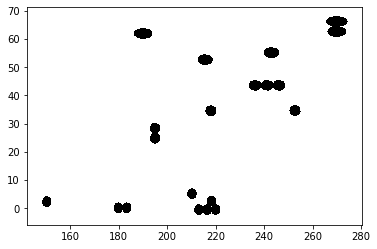

In [6]:
pl.plot(reachable['RA'], reachable['DEC'], marker=',', lw=0.0, c='k')

In [7]:
np.unique(reachable['FIBERSTATUS'].data, return_counts=True)

(array([      0,       8,     512,     520,   65536,   65544,   66048,
          66056,  999999, 4194304, 4194816], dtype=int32),
 array([ 241429,    3082,   10736,    3253,     718,      15,      36,
              7, 1108673,     530,       2]))

In [8]:
assigned = reachable[reachable['FIBERSTATUS'] == 0]
assigned

RA,DEC,REF_EPOCH,PARALLAX,PMRA,PMDEC,TARGETID,SUBPRIORITY,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,NUMOBS_MORE,NUMOBS,ZWARN_MTL,ZTILEID,TARGET_STATE,TIMESTAMP,VERSION,LOCATION,TILEID,TILELOCID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,FIBER,FIBERSTATUS,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,PRIORITY,DELTA_X,DELTA_Y,EXPTIME,PSF_TO_FIBER_SPECFLUX,NIGHT,EXPID,MJD,INTEG_COADD_FLUX_B,MEDIAN_COADD_FLUX_B,MEDIAN_COADD_SNR_B,INTEG_COADD_FLUX_R,MEDIAN_COADD_FLUX_R,MEDIAN_COADD_SNR_R,INTEG_COADD_FLUX_Z,MEDIAN_COADD_FLUX_Z,MEDIAN_COADD_SNR_Z,TSNR2_ELG_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_ELG_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_ELG_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_ELG,TSNR2_LYA,TSNR2_BGS,TSNR2_QSO,TSNR2_LRG,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,FIBERFLUX_R,FLUX_G,FLUX_R,MW_TRANSMISSION_G,MW_TRANSMISSION_R,PHOTSYS,REF_CAT,GMAG,GMAG_DRED,RMAG,RMAG_DRED,FIBER_RMAG,FIBER_RMAG_DRED,GMR,GMR_DRED,BGS_A_SUCCESS
float64,float64,float32,float32,float32,float32,int64,float64,int32,int64,int64,int64,int64,int64,int32,bytes30,bytes25,bytes14,int64,int64,int64,float64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,int32,bytes3,float32,float32,int32,float64,float64,float64,float64,int32,int32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,float32,float32,float32,float32,float32,bytes1,bytes2,float32,float32,float32,float32,float32,float32,float32,float32,bool
212.07182231138097,-2.1576366940231786,0.0,0.0,0.0,0.0,39627733927462346,0.7155266907459459,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:14:10,0.57.0,1463,532,5321463,8691.917048618197,110.1924173269175 .. -13.909760857702603,0.20831738790192758,3.870861964601318e-05,0,7886,GALAXY,,10,300.0186497028917,523,0,TGT,175.50546,-366.08752,102100,-0.004,0.001,329.2138,0.7514636097863017,20210512,88162,59347.28192359,2494.5547,1.495369,1.2990925,4100.856,2.2913628,3.9154603,4768.7817,2.1793647,4.723067,0.013547539,7.073917,109.063484,0.39787793,0.16146766,5.505917,0.007272676,489.47827,0.8947302,7.7659473,18.000463,0.0,1035.9039,4.453982,9.583865,23.519928,7.0811896,1634.4458,5.74659,17.51128,1152921504606846976,131074,0,6.5144067,5.435668,15.029476,0.8395581,0.88887244,S,,20.661867,20.471994,19.55764,19.429739,20.465313,20.337412,1.1042271,1.0422554,True
212.13195284744052,-2.1397232701515705,0.0,0.0,0.0,0.0,39627733927463584,0.3064671342899772,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:14:10,0.57.0,1442,532,5321442,8181.238723360002,650.8494234496903 .. 26.321080977338845,0.18489118881349448,8.151114524677556e-05,0,7898,GALAXY,,10,121.69535649672616,515,0,TGT,159.9167,-360.7208,102100,-0.003,-0.0,329.2138,0.7250493309558984,20210512,88162,59347.28192359,2839.2163,1.7219174,1.4668155,4295.8286,2.4269316,4.082689,5179.0156,2.3733006,4.9972258,0.013628212,7.094321,109.622696,0.40032744,0.16285975,5.484065,0.007271832,486.65622,0.8906726,7.714434,17.933203,0.0,1025.0463,4.4246182,9.502515,23.430895,7.1015925,1621.3252,5.7156186,17.379808,1152921504606846976,131074,0,6.960086,14.839426,41.38945,0.83804214,0.8877909,S,,19.571457,19.379622,18.457775,18.328552,20.393463,20.26424,1.1136818,1.0510693,True
212.14293772910978,-2.127708100431868,0.0,0.0,0.0,0.0,39627733927463809,0.9682231030567523,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:14:10,0.57.0,1464,529,5291464,8649.267828658223,482.3641546970651 .. 28.304609010743402,0.18572600120311122,5.0569333051126286e-05,0,7825,GALAXY,,10,491.2810438387096,524,0,TGT,174.46136,-357.95212,102100,0.007,-0.013,836.0849,0.7045758604118871,20210507,87604,59342.33186133,5241.1284,3.161646,2.7221062,9271.688,5.1619253,7.320931,11833.8,5.418451,9.364234,0.014638815,7.937166,115.9185,0.43463737,0.16990733,4.3820224,0.005671774,385.05923,0.7093758

In [9]:
good_zs  = assigned[(assigned['ZWARN'] == 0) & (assigned['DELTACHI2'] > 40.)]
good_zs

RA,DEC,REF_EPOCH,PARALLAX,PMRA,PMDEC,TARGETID,SUBPRIORITY,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,NUMOBS_MORE,NUMOBS,ZWARN_MTL,ZTILEID,TARGET_STATE,TIMESTAMP,VERSION,LOCATION,TILEID,TILELOCID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,FIBER,FIBERSTATUS,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,PRIORITY,DELTA_X,DELTA_Y,EXPTIME,PSF_TO_FIBER_SPECFLUX,NIGHT,EXPID,MJD,INTEG_COADD_FLUX_B,MEDIAN_COADD_FLUX_B,MEDIAN_COADD_SNR_B,INTEG_COADD_FLUX_R,MEDIAN_COADD_FLUX_R,MEDIAN_COADD_SNR_R,INTEG_COADD_FLUX_Z,MEDIAN_COADD_FLUX_Z,MEDIAN_COADD_SNR_Z,TSNR2_ELG_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_ELG_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_ELG_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_ELG,TSNR2_LYA,TSNR2_BGS,TSNR2_QSO,TSNR2_LRG,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,FIBERFLUX_R,FLUX_G,FLUX_R,MW_TRANSMISSION_G,MW_TRANSMISSION_R,PHOTSYS,REF_CAT,GMAG,GMAG_DRED,RMAG,RMAG_DRED,FIBER_RMAG,FIBER_RMAG_DRED,GMR,GMR_DRED,BGS_A_SUCCESS
float64,float64,float32,float32,float32,float32,int64,float64,int32,int64,int64,int64,int64,int64,int32,bytes30,bytes25,bytes14,int64,int64,int64,float64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,int32,bytes3,float32,float32,int32,float64,float64,float64,float64,int32,int32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,float32,float32,float32,float32,float32,bytes1,bytes2,float32,float32,float32,float32,float32,float32,float32,float32,bool
212.07182231138097,-2.1576366940231786,0.0,0.0,0.0,0.0,39627733927462346,0.7155266907459459,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:14:10,0.57.0,1463,532,5321463,8691.917048618197,110.1924173269175 .. -13.909760857702603,0.20831738790192758,3.870861964601318e-05,0,7886,GALAXY,,10,300.0186497028917,523,0,TGT,175.50546,-366.08752,102100,-0.004,0.001,329.2138,0.7514636097863017,20210512,88162,59347.28192359,2494.5547,1.495369,1.2990925,4100.856,2.2913628,3.9154603,4768.7817,2.1793647,4.723067,0.013547539,7.073917,109.063484,0.39787793,0.16146766,5.505917,0.007272676,489.47827,0.8947302,7.7659473,18.000463,0.0,1035.9039,4.453982,9.583865,23.519928,7.0811896,1634.4458,5.74659,17.51128,1152921504606846976,131074,0,6.5144067,5.435668,15.029476,0.8395581,0.88887244,S,,20.661867,20.471994,19.55764,19.429739,20.465313,20.337412,1.1042271,1.0422554,True
212.13195284744052,-2.1397232701515705,0.0,0.0,0.0,0.0,39627733927463584,0.3064671342899772,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:14:10,0.57.0,1442,532,5321442,8181.238723360002,650.8494234496903 .. 26.321080977338845,0.18489118881349448,8.151114524677556e-05,0,7898,GALAXY,,10,121.69535649672616,515,0,TGT,159.9167,-360.7208,102100,-0.003,-0.0,329.2138,0.7250493309558984,20210512,88162,59347.28192359,2839.2163,1.7219174,1.4668155,4295.8286,2.4269316,4.082689,5179.0156,2.3733006,4.9972258,0.013628212,7.094321,109.622696,0.40032744,0.16285975,5.484065,0.007271832,486.65622,0.8906726,7.714434,17.933203,0.0,1025.0463,4.4246182,9.502515,23.430895,7.1015925,1621.3252,5.7156186,17.379808,1152921504606846976,131074,0,6.960086,14.839426,41.38945,0.83804214,0.8877909,S,,19.571457,19.379622,18.457775,18.328552,20.393463,20.26424,1.1136818,1.0510693,True
212.14293772910978,-2.127708100431868,0.0,0.0,0.0,0.0,39627733927463809,0.9682231030567523,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:14:10,0.57.0,1464,529,5291464,8649.267828658223,482.3641546970651 .. 28.304609010743402,0.18572600120311122,5.0569333051126286e-05,0,7825,GALAXY,,10,491.2810438387096,524,0,TGT,174.46136,-357.95212,102100,0.007,-0.013,836.0849,0.7045758604118871,20210507,87604,59342.33186133,5241.1284,3.161646,2.7221062,9271.688,5.1619253,7.320931,11833.8,5.418451,9.364234,0.014638815,7.937166,115.9185,0.43463737,0.16990733,4.3820224,0.005671774,385.05923,0.7093758

In [10]:
np.unique(assigned['ZTILEID'].data)

array([ -1,  12,  13,  14,  15,  16,  17,  18,  19,  20,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 120, 121, 122, 123, 124, 125, 126, 127, 128, 147, 148, 149,
       150, 151, 152, 153, 154, 155, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 183, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210,
       228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 255, 256, 257,
       258, 259, 260, 261, 262, 263, 264, 282, 283, 284, 285, 286, 287,
       288, 289, 290, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318,
       336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 363, 364, 365,
       366, 367, 368, 369, 370, 371, 372, 390, 391, 392, 393, 394, 395,
       396, 397, 398, 399, 417, 418, 419, 420, 421, 422, 423, 424, 425,
       426, 495, 496, 497, 498, 499, 500, 501, 502, 503, 525, 526, 527,
       528, 529, 530, 531, 532, 533, 555, 556, 557, 558, 559, 56

Text(0.5, 0, '$\\Delta \\chi^2$')

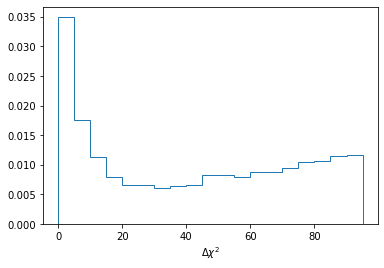

In [11]:
_ = pl.hist(assigned['DELTACHI2'].data, bins=np.arange(0., 100., 5.), histtype='step', density=True)
pl.xlabel(r'$\Delta \chi^2$')

16 	 0.8972
120 	 0.8923
121 	 0.8543
122 	 0.8456
123 	 0.7991
124 	 0.7702
125 	 0.7504
126 	 0.7937
127 	 0.7864
128 	 0.8344
395 	 0.8649
396 	 0.8706
422 	 0.8387
423 	 0.8315
424 	 0.8963
564 	 0.8554


Text(0, 0.5, 'BGS Bright $z$ Success')

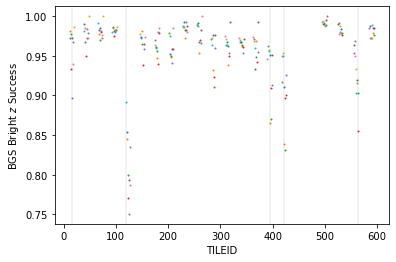

In [89]:
pl.axvline( 16, c='k', lw=0.1)
pl.axvline(120, c='k', lw=0.1)
pl.axvline(395, c='k', lw=0.1)
pl.axvline(422, c='k', lw=0.1)
pl.axvline(564, c='k', lw=0.1)

badids = []

for tid in np.unique(assigned['ZTILEID'].data):
    if tid == -1:
        continue
    
    this_tile = assigned[assigned['ZTILEID'].data == tid]    
    this_zs   =  good_zs[ good_zs['ZTILEID'].data == tid]
    
    zfrac     = len(this_zs) / len(this_tile)
    
    mjd       = np.median(this_tile['MJD'].data)
    
    pl.plot(tid, zfrac, marker='.', lw=0.0, markersize=2)
    
    # print(tid, len(this_tile), len(this_zs))

    if zfrac < 0.90:
        badids.append([tid, zfrac])
        
        print('{:d} \t {:.4f}'.format(tid, zfrac))

badids = np.array(badids)

pl.xlabel('TILEID')
pl.ylabel(r'BGS Bright $z$ Success')

In [13]:
badids

array([[ 16.        ,   0.89719626],
       [120.        ,   0.8922632 ],
       [121.        ,   0.85434174],
       [122.        ,   0.84557908],
       [123.        ,   0.79910045],
       [124.        ,   0.77024793],
       [125.        ,   0.75044883],
       [126.        ,   0.79373849],
       [127.        ,   0.78640777],
       [128.        ,   0.834375  ],
       [395.        ,   0.86486486],
       [396.        ,   0.87058824],
       [422.        ,   0.83870968],
       [423.        ,   0.83146067],
       [424.        ,   0.8962963 ],
       [564.        ,   0.85542169]])

(59330.0, 59360.0)

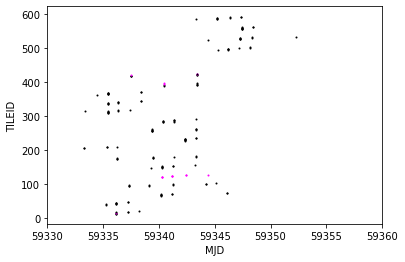

In [14]:
for tid in np.unique(assigned['ZTILEID'].data):
    if tid == -1:
        continue
    
    this_tile = assigned[assigned['ZTILEID'].data == tid]    
    this_zs   =  good_zs[ good_zs['ZTILEID'].data == tid]
    
    zfrac     = len(this_zs) / len(this_tile)
    
    mjd       = np.median(this_tile['MJD'].data)
    
    if tid in badids[:,0]:
        color = 'magenta'
    else:
        color = 'black'
    
    pl.plot(mjd, tid, marker='.', lw=0.0, markersize=2, c=color)
    
pl.xlabel('MJD')
pl.ylabel('TILEID')

pl.xlim(59330., 59360.)

In [15]:
bad = assigned[np.isin(assigned['TILEID'].data, badids)]
bad

RA,DEC,REF_EPOCH,PARALLAX,PMRA,PMDEC,TARGETID,SUBPRIORITY,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,NUMOBS_MORE,NUMOBS,ZWARN_MTL,ZTILEID,TARGET_STATE,TIMESTAMP,VERSION,LOCATION,TILEID,TILELOCID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,FIBER,FIBERSTATUS,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,PRIORITY,DELTA_X,DELTA_Y,EXPTIME,PSF_TO_FIBER_SPECFLUX,NIGHT,EXPID,MJD,INTEG_COADD_FLUX_B,MEDIAN_COADD_FLUX_B,MEDIAN_COADD_SNR_B,INTEG_COADD_FLUX_R,MEDIAN_COADD_FLUX_R,MEDIAN_COADD_SNR_R,INTEG_COADD_FLUX_Z,MEDIAN_COADD_FLUX_Z,MEDIAN_COADD_SNR_Z,TSNR2_ELG_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_ELG_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_ELG_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_ELG,TSNR2_LYA,TSNR2_BGS,TSNR2_QSO,TSNR2_LRG,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,FIBERFLUX_R,FLUX_G,FLUX_R,MW_TRANSMISSION_G,MW_TRANSMISSION_R,PHOTSYS,REF_CAT,GMAG,GMAG_DRED,RMAG,RMAG_DRED,FIBER_RMAG,FIBER_RMAG_DRED,GMR,GMR_DRED,BGS_A_SUCCESS
float64,float64,float32,float32,float32,float32,int64,float64,int32,int64,int64,int64,int64,int64,int32,bytes30,bytes25,bytes14,int64,int64,int64,float64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,int32,bytes3,float32,float32,int32,float64,float64,float64,float64,int32,int32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,float32,float32,float32,float32,float32,bytes1,bytes2,float32,float32,float32,float32,float32,float32,float32,float32,bool
149.6746792125676,0.5867454414717633,0.0,0.0,0.0,0.0,39627799316664075,0.955950916948373,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:15:17,0.57.0,1416,16,161416,8462.509771894664,185.61657521838495 .. 3.661779758510578,0.3643603477076039,8.648213387902737e-05,0,7926,GALAXY,,10,32.79022868722677,510,0,TGT,130.3188,-383.2677,102100,0.004,0.002,80.0497,0.7225630840815174,20210416,85070,59321.14155279,726.6282,0.47747183,0.37096757,2084.666,1.1852521,1.8814545,2590.4683,1.1534935,2.5948405,0.01182949,6.272313,96.90926,0.34780803,0.1472748,3.8116167,0.0061639766,378.70856,0.65512824,5.471349,16.118423,0.0,837.19366,3.797098,8.1013,19.94187,6.2784767,1312.8115,4.8000345,13.719924,1152921504606846976,131074,0,3.1041708,7.1946917,23.086872,0.92180276,0.9466286,S,,20.35747,20.269064,19.091587,19.032036,21.270136,21.210585,1.2658825,1.2370281,True
149.91599743015445,0.587577255770101,0.0,0.0,0.0,0.0,39627799320858199,0.23860909774172434,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:15:17,0.57.0,512,16,160512,8460.707651868463,1261.3013567301098 .. 9.478406413254833,0.06532525656447843,7.762065902494756e-06,0,7924,GALAXY,,10,1418.983191892039,379,0,TGT,68.90603,-381.89493,102100,0.006,0.009,80.0497,0.7157617978686991,20210416,85070,59321.14155274,7272.4277,4.0465593,2.8578463,6006.6187,3.3072822,5.1126704,5449.4053,2.4995182,5.2434106,0.015789757,14.698801,101.72963,0.55383295,0.12037269,4.13162,0.008542337,463.10974,0.7532558,6.117777,18.76826,0.0,820.4971,4.116918,8.636975,22.915668,14.707343,1385.3364,5.424007,14.875124,1152921504606846976,131074,0,2.253948,60.22302,76.92286,0.92759484,0.9506312,S,,18.050594,17.96899,17.784863,17.729893,21.61764,21.56267,0.2657318,0.2390976,True
149.91900344715572,0.5379014110584031,0.0,0.0,0.0,0.0,39627799320858281,0.46262091421179985,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:15:17,0.57.0,525,16,160525,8505.664582550526,940.4231224543142 .. 45.89896631703091,0.045371281465355746,3.3836251695643444e-06,0,7922,GALAXY,,10,2533.726595580578,398,0,TGT,68.33542,-395.45987,102100,0.007,0.006,80.0497,0.7167598958310573,20210416,85070,59321.14155274,2113.1504,1.1119109,0.8090177,1348.8494,0.6441043,1.1108719,871.0413,0.42065477,0.9358963,0.015234026,14.174818,98.19676,0.5340859,0.11647648,3.9890501,0.008403555,450.15436,0.7282366,5.896766,18.240826

In [16]:
badids

array([[ 16.        ,   0.89719626],
       [120.        ,   0.8922632 ],
       [121.        ,   0.85434174],
       [122.        ,   0.84557908],
       [123.        ,   0.79910045],
       [124.        ,   0.77024793],
       [125.        ,   0.75044883],
       [126.        ,   0.79373849],
       [127.        ,   0.78640777],
       [128.        ,   0.834375  ],
       [395.        ,   0.86486486],
       [396.        ,   0.87058824],
       [422.        ,   0.83870968],
       [423.        ,   0.83146067],
       [424.        ,   0.8962963 ],
       [564.        ,   0.85542169]])

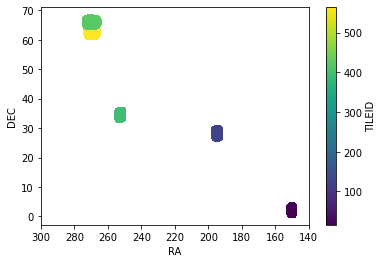

In [17]:
pl.scatter(bad['RA'], bad['DEC'], c=bad['TILEID'], marker=',', lw=0.0)

pl.xlim(300., 140.)

pl.xlabel('RA')
pl.ylabel('DEC')

pl.colorbar(label='TILEID')

In [18]:
bad['DELTA_R'] = np.sqrt(bad['DELTA_X']**2. + bad['DELTA_Y']**2.)

Text(0.5, 0, 'DELTA R')

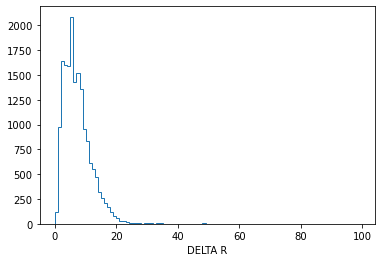

In [19]:
_ = pl.hist(1000. * bad['DELTA_R'], histtype='step', bins=np.arange(0., 100., 1.))

pl.xlabel('DELTA R')

In [20]:
tiles  = Table.read('/global/cfs/cdirs/desi/survey/ops/surveyops/trunk/ops/tiles-sv3.ecsv')
btiles = tiles[(tiles['PROGRAM'] == 'BRIGHT') & (tiles['STATUS'] == 'done')]
btiles

TILEID,PASS,RA,DEC,PROGRAM,IN_DESI,PRIORITY,STATUS,EBV_MED,DESIGNHA,DONEFRAC,AVAILABLE
int64,int32,float64,float64,str6,bool,float64,str8,float32,float32,float32,bool
12,0,150.04,2.286,BRIGHT,True,0.000e+00,done,0.022782475,0.00,1.0455,False
13,1,150.061,2.069,BRIGHT,True,0.000e+00,done,0.023243327,0.00,1.1505,False
14,2,150.212,2.226,BRIGHT,True,0.000e+00,done,0.022683823,0.00,1.0456,False
15,3,149.98,2.171,BRIGHT,True,0.000e+00,done,0.023039486,0.00,1.1052,False
16,4,150.187,2.099,BRIGHT,True,0.000e+00,done,0.023041949,0.00,1.0776,False
17,5,150.106,2.302,BRIGHT,True,0.000e+00,done,0.022638734,0.00,1.1865,False
18,6,149.993,2.237,BRIGHT,True,0.000e+00,done,0.022844847,0.00,1.4589,False
19,7,150.128,2.065,BRIGHT,True,0.000e+00,done,0.023041053,0.00,1.3565,False
20,8,150.17,2.28,BRIGHT,True,0.000e+00,done,0.02263027,0.00,1.1368,False


In [21]:
tsnrs = Table.read('/global/cfs/cdirs/desi/spectro/redux/daily/tsnr-exposures.fits', hdu=1)
tsnrs = tsnrs[np.isin(tsnrs['TILEID'], btiles['TILEID'])]
tsnrs

NIGHT,EXPID,TILEID,SURVEY,FAPRGRM,FAFLAVOR,EXPTIME,EFFTIME_SPEC,GOALTIME,GOALTYPE,MINTFRAC,AIRMASS,EBV,SEEING_ETC,EFFTIME_ETC,TSNR2_ELG,TSNR2_QSO,TSNR2_LRG,TSNR2_LYA,TSNR2_BGS,TSNR2_GPBDARK,TSNR2_GPBBRIGHT,TSNR2_GPBBACKUP,ELG_EFFTIME_DARK,BGS_EFFTIME_BRIGHT,LYA_EFFTIME_DARK,GPB_EFFTIME_DARK,GPB_EFFTIME_BRIGHT,GPB_EFFTIME_BACKUP,TRANSPARENCY_GFA,SEEING_GFA,FIBER_FRACFLUX_GFA,FIBER_FRACFLUX_ELG_GFA,FIBER_FRACFLUX_BGS_GFA,FIBERFAC_GFA,FIBERFAC_ELG_GFA,FIBERFAC_BGS_GFA,AIRMASS_GFA,SKY_MAG_AB_GFA,SKY_MAG_G_SPEC,SKY_MAG_R_SPEC,SKY_MAG_Z_SPEC,EFFTIME_GFA,EFFTIME_DARK_GFA,EFFTIME_BRIGHT_GFA,EFFTIME_BACKUP_GFA
int32,int32,int32,bytes7,bytes19,bytes19,float64,float64,float64,bytes7,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float64,float64,float64,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
20210405,83522,12,sv3,bright,sv3bright,1087.2236328125,1.8642935371398928,220.0,bright,0.9,1.2683180570602417,0.02034863829612732,1.2416000366210938,1.9704999923706055,0.21506232023239136,0.05342129245400429,0.14565566182136536,0.2176338137631117,13.31638240814209,0.0,0.0,0.0,1.8495359539985663,1.8642935371398928,2.4896781687045,0.0,0.0,0.0,0.0740698694393078,1.2750868969641278,0.46926167510731964,0.35087031639049493,0.16444694231100038,0.0583045357430305,0.05969941794132611,0.060956749956209914,1.2476632901391898,20.185822131786963,20.733287084939803,20.220435694840162,19.285456734097156,1.838273737634042,1.7455050325733383,1.838273737634042,1.7453506678932256
20210405,83526,39,sv3,bright,sv3bright,491.12127685546875,217.55007080078127,220.0,bright,0.9,1.5354160070419312,0.02328423038125038,0.0,0.0,23.347288131713867,5.886923313140869,16.4263858795166,15.539928264031186,1553.9290771484375,0.0,0.0,0.0,200.78667793273934,217.55007080078127,177.77301915181624,0.0,0.0,0.0,1.1160679283394475,1.3307057969974616,0.4410218325803964,0.33404195564548156,0.15775461328498286,0.8216242344281088,0.8451683334320832,0.8623143683992909,1.515339026465338,20.857570201417026,21.7880690448049,20.959654041792643,19.212097680116894,242.5494901823558,220.9065901518489,242.5494901823558,241.07422485485176
20210405,83527,66,sv3,bright,sv3bright,572.2549438476562,184.10497314453127,220.0,bright,0.9,1.5486550331115723,0.021584704518318176,1.5605000257492065,219.89669799804688,19.94735336303711,4.991358757019043,14.020892143249512,12.606907515740023,1315.0355224609375,0.0,0.0,0.0,171.5472389221192,184.10497314453127,144.21997149293466,0.0,0.0,0.0,1.0604372209586597,1.483372166801359,0.3927273914264954,0.3025210488076052,0.14434937212353102,0.6600202346705586,0.702521104085551,0.7302867862606071,1.5235964979314538,20.869874103784944,21.760026471805567,20.968654615911987,19.291398130669087,211.2305583366557,188.01065901557436,211.2305583366557,184.86170845015184
20210405,83528,93,sv3,bright,sv3bright,1080.5513916015625,4.601463928222657,220.0,bright,0.9,1.321005940437317,0.012340082786977291,1.45169997215271,4.131199836730957,0.527600109577179,0.13673534989356995,0.36288636922836304,0.7241035331098828,32.86759948730469,0.0,0.0,0.0,4.53736094236374,4.601463928222657,8.283569207805881,0.0,0.0,0.0,0.08465602356496543,1.0392766798987463,0.5742542783883974,0.41256853862696674,0.1891300085130472,0.07350076065776642,0.07297673241037726,0.07309977677187253,1.3038368969004397,20.129518417713655,21.292588245150938,20.153270405106035,19.359507846099117,2.5451924924787948,2.5010248223045712,2.5451924924787948,2.717450856306093
20210405,83530,120,sv3,bright,sv3bright,881.7928466796875,92.62713256835939,220.0,bright,0.9,1.2236419916152954,0.009578131139278412,1.45169997215271,82.997802734375,10.207770347595215,2.611377239227295,7.174319267272949,10.652879139455035,661.6223754882812,0.0,0.0,0.0,87.78682498931887,92.62713256835939,121.86635968350717,0.0,0.0,0.0,0.4326317754829042,1.2216886817615804,0.4990762169590266,0.36

In [22]:
np.unique(tsnrs['SURVEY'].data, return_counts=True)

(array([b'sv3', b'unknown'], dtype='|S7'), array([287,  11]))

(0.5, 2.5)

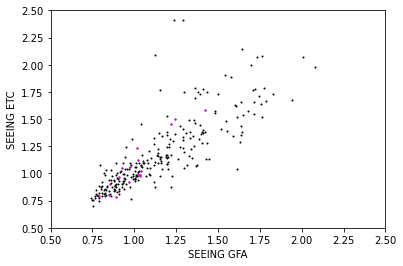

In [23]:
isin = np.isin(tsnrs['TILEID'].data, badids[:,0])

pl.plot(tsnrs['SEEING_GFA'].data,       tsnrs['SEEING_ETC'].data, c='k', lw=0.0, marker='.', markersize=2)
pl.plot(tsnrs['SEEING_GFA'].data[isin], tsnrs['SEEING_ETC'].data[isin], c='magenta', lw=0.0, marker='.', markersize=2)

pl.xlabel('SEEING GFA')
pl.ylabel('SEEING ETC')

pl.xlim(0.5, 2.5)
pl.ylim(0.5, 2.5)

In [24]:
bad_tsnrs = tsnrs[np.isin(tsnrs['TILEID'], badids[:,0])]
bad_tsnrs.sort('TILEID')
bad_tsnrs

NIGHT,EXPID,TILEID,SURVEY,FAPRGRM,FAFLAVOR,EXPTIME,EFFTIME_SPEC,GOALTIME,GOALTYPE,MINTFRAC,AIRMASS,EBV,SEEING_ETC,EFFTIME_ETC,TSNR2_ELG,TSNR2_QSO,TSNR2_LRG,TSNR2_LYA,TSNR2_BGS,TSNR2_GPBDARK,TSNR2_GPBBRIGHT,TSNR2_GPBBACKUP,ELG_EFFTIME_DARK,BGS_EFFTIME_BRIGHT,LYA_EFFTIME_DARK,GPB_EFFTIME_DARK,GPB_EFFTIME_BRIGHT,GPB_EFFTIME_BACKUP,TRANSPARENCY_GFA,SEEING_GFA,FIBER_FRACFLUX_GFA,FIBER_FRACFLUX_ELG_GFA,FIBER_FRACFLUX_BGS_GFA,FIBERFAC_GFA,FIBERFAC_ELG_GFA,FIBERFAC_BGS_GFA,AIRMASS_GFA,SKY_MAG_AB_GFA,SKY_MAG_G_SPEC,SKY_MAG_R_SPEC,SKY_MAG_Z_SPEC,EFFTIME_GFA,EFFTIME_DARK_GFA,EFFTIME_BRIGHT_GFA,EFFTIME_BACKUP_GFA
int32,int32,int32,bytes7,bytes19,bytes19,float64,float64,float64,bytes7,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float64,float64,float64,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
20210416,85070,16,sv3,bright,sv3bright,80.0497055053711,28.49942077636719,220.0,bright,0.9,1.1577539443969727,0.01994933746755123,0.0,0.0,3.009338855743408,0.7613458037376404,2.1023707389831543,1.3659979576885235,203.56729125976562,0.0,0.0,0.0,25.880314159393322,28.49942077636719,15.626686106111388,0.0,0.0,0.0,1.018801436565188,1.018764461292379,0.6201316130709911,0.44224720537444107,0.2021678179677575,1.0672388095393317,1.0392411047932695,1.029279128592079,1.1578209068238265,21.026839426116993,21.518241695590756,21.079301868998364,19.484777467304813,28.269389739857594,23.469447425768372,28.269389739857594,45.7904224947694
20210417,85183,16,sv3,bright,sv3bright,403.2674560546875,208.57253662109378,220.0,bright,0.9,1.1756329536437988,0.01994933746755123,0.9994000196456909,213.0720977783203,24.93260383605957,5.886279582977295,15.729657173156738,13.748603806458414,1489.8038330078125,0.0,0.0,0.0,214.4203929901124,208.57253662109378,157.28070080307035,0.0,0.0,0.0,1.0238289458805,1.0198925970447723,0.6218006057949539,0.44286291365145136,0.20216835520516763,1.066352094728542,1.043135116946793,1.0343518966979919,1.1728063586830872,20.213276285297937,20.027117167989836,20.23306876791679,19.175563606405312,202.26684787115724,175.43283406831267,202.26684787115724,288.3731547606735
20210405,83530,120,sv3,bright,sv3bright,881.7928466796875,92.62713256835939,220.0,bright,0.9,1.2236419916152954,0.009578131139278412,1.45169997215271,82.997802734375,10.207770347595215,2.611377239227295,7.174319267272949,10.652879139455035,661.6223754882812,0.0,0.0,0.0,87.78682498931887,92.62713256835939,121.86635968350717,0.0,0.0,0.0,0.4326317754829042,1.2216886817615804,0.4990762169590266,0.36959028969497854,0.17236335911714656,0.34976813685707864,0.35472581761312827,0.35983602876657683,1.2019296917032565,20.650148938302763,21.65834127958734,20.67353145741354,19.376191338090017,78.51761516937718,73.82824142847942,78.51761516937718,80.72108932022924
20210407,83871,120,sv3,bright,sv3bright,243.5583953857422,235.78296875,220.0,bright,0.9,1.0036309957504272,0.009578131139278412,1.051800012588501,246.21710205078125,24.418458938598633,6.263134002685547,17.295482635498047,15.961098287813366,1684.1640625,0.0,0.0,0.0,209.99874687194833,235.78296875,182.59110231358355,0.0,0.0,0.0,1.0537456177501672,0.9267283607912504,0.6500558192955507,0.46013621248360403,0.20913280810914872,1.1669378270291846,1.1264033964335778,1.1066384628399313,1.0032356460503935,21.496453758425908,22.131718800101012,21.501568246817385,19.83233757890786,228.47000029948717,218.72875556934758,228.47000029948717,286.6804017944606
20210415,84935,121,unknown,unknown,unknown,501.7322,0.0,0.0,unknown,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07312225423834932,1.2027327897701805,0.4951255533431557,0.36524570124938244,0.17012348664203492,0.6987028904221155,0.70773379647439,0.7162912060054257,1.019923324301109,21.091003265820053,21.904361518504633,21.027031060189202,19.577072433209064,0.0,0.0,0.0,0.0
20210416,85079,121,sv3,

Text(0.5, 0, 'SEEING ETC')

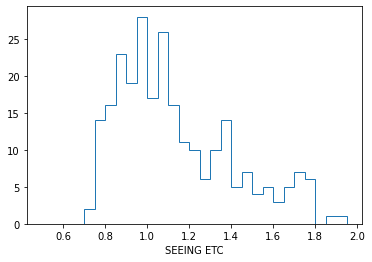

In [25]:
_ = pl.hist(tsnrs['SEEING_ETC'], histtype='step', bins=np.arange(0.5, 2.0, 0.05))
pl.xlabel('SEEING ETC')

(0.5, 2.5)

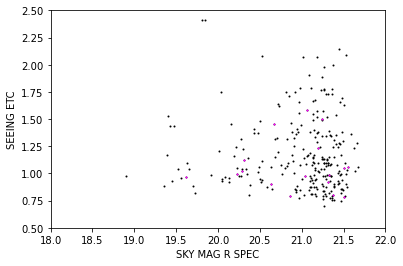

In [26]:
pl.plot(tsnrs['SKY_MAG_R_SPEC'].data, tsnrs['SEEING_ETC'].data, c='k', lw=0.0, marker='.', markersize=2)
pl.plot(bad_tsnrs['SKY_MAG_R_SPEC'].data, bad_tsnrs['SEEING_ETC'].data, c='magenta', lw=0.0, marker='.', markersize=2)

pl.xlabel('SKY MAG R SPEC')
pl.ylabel('SEEING ETC')

pl.xlim(18., 22.)
pl.ylim(0.5, 2.5)

(0.5, 2.5)

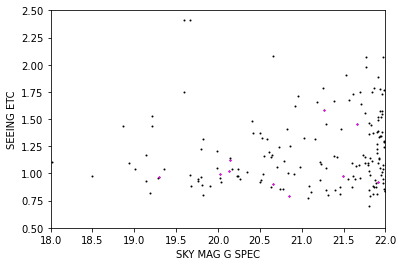

In [27]:
pl.plot(tsnrs['SKY_MAG_G_SPEC'].data, tsnrs['SEEING_ETC'].data, c='k', lw=0.0, marker='.', markersize=2)
pl.plot(bad_tsnrs['SKY_MAG_G_SPEC'].data, bad_tsnrs['SEEING_ETC'].data, c='magenta', lw=0.0, marker='.', markersize=2)

pl.xlabel('SKY MAG G SPEC')
pl.ylabel('SEEING ETC')

pl.xlim(18., 22.)
pl.ylim(0.5, 2.5)

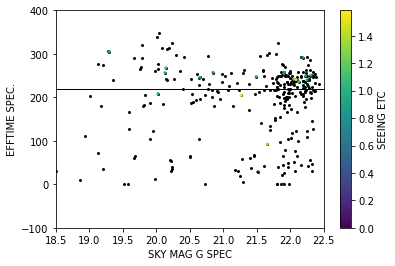

In [28]:
pl.axhline(220., c='k', lw=1.)

pl.scatter(tsnrs['SKY_MAG_G_SPEC'].data, tsnrs['EFFTIME_SPEC'].data, c='k', lw=0.0, marker='.')
pl.scatter(bad_tsnrs['SKY_MAG_G_SPEC'].data, bad_tsnrs['EFFTIME_SPEC'].data, c=bad_tsnrs['SEEING_ETC'], lw=0.0, marker='.')

pl.xlabel('SKY MAG G SPEC')
pl.ylabel('EFFTIME SPEC.')

pl.xlim(18.5, 22.5)
pl.ylim(-100, 400.)

pl.colorbar(label='SEEING ETC')

In [29]:
one_tile = assigned[assigned['TILEID'] == 120]
one_tile

RA,DEC,REF_EPOCH,PARALLAX,PMRA,PMDEC,TARGETID,SUBPRIORITY,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,NUMOBS_MORE,NUMOBS,ZWARN_MTL,ZTILEID,TARGET_STATE,TIMESTAMP,VERSION,LOCATION,TILEID,TILELOCID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,FIBER,FIBERSTATUS,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,PRIORITY,DELTA_X,DELTA_Y,EXPTIME,PSF_TO_FIBER_SPECFLUX,NIGHT,EXPID,MJD,INTEG_COADD_FLUX_B,MEDIAN_COADD_FLUX_B,MEDIAN_COADD_SNR_B,INTEG_COADD_FLUX_R,MEDIAN_COADD_FLUX_R,MEDIAN_COADD_SNR_R,INTEG_COADD_FLUX_Z,MEDIAN_COADD_FLUX_Z,MEDIAN_COADD_SNR_Z,TSNR2_ELG_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_ELG_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_ELG_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_ELG,TSNR2_LYA,TSNR2_BGS,TSNR2_QSO,TSNR2_LRG,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,FIBERFLUX_R,FLUX_G,FLUX_R,MW_TRANSMISSION_G,MW_TRANSMISSION_R,PHOTSYS,REF_CAT,GMAG,GMAG_DRED,RMAG,RMAG_DRED,FIBER_RMAG,FIBER_RMAG_DRED,GMR,GMR_DRED,BGS_A_SUCCESS
float64,float64,float32,float32,float32,float32,int64,float64,int32,int64,int64,int64,int64,int64,int32,bytes30,bytes25,bytes14,int64,int64,int64,float64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,int32,bytes3,float32,float32,int32,float64,float64,float64,float64,int32,int32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,float32,float32,float32,float32,float32,bytes1,bytes2,float32,float32,float32,float32,float32,float32,float32,float32,bool
194.04595630426357,26.866723566380518,2015.5,-1.1975766,-3.0181653,2.0186377,39628411743765979,0.9633202314055777,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:15:42,0.57.0,1463,120,1201463,10189.729052484035,3500.6597505929144 .. 14.749471491493306,0.14665164098044584,3.320774843872324e-05,0,7921,GALAXY,,10,3275.1341397929937,523,0,TGT,166.88159,-366.93637,102100,0.002,-0.0,881.7928,0.7338963703419126,20210405,83530,59310.19705732,18786.367,11.184457,9.356326,24630.377,13.722724,18.209345,26199.875,11.946592,20.516043,0.025647484,13.762014,201.50093,0.7573332,0.29876733,9.02809,0.011054984,777.6691,1.444985,12.627159,26.573002,0.0,1593.1041,6.6607165,14.550565,35.62674,13.773069,2572.2742,8.863034,27.476492,1152921504606846976,131074,0,40.70077,52.656155,125.92098,0.9748436,0.98298395,S,G2,18.196377,18.168715,17.249756,17.231121,18.475994,18.45736,0.94662094,0.93759346,True
194.46380470526788,26.802253236332316,0.0,0.0,0.0,0.0,39628411747962088,0.9995440562442647,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:15:42,0.57.0,512,120,1200512,9693.679696083069,3064.54058371332 .. 64.69708415881102,0.1331009437708142,1.7632708655463003e-06,0,7925,GALAXY,,10,24025.297302246094,379,0,TGT,72.23568,-382.60754,102100,0.003,-0.002,881.7928,0.7438277916219783,20210405,83530,59310.19705733,14553.314,7.798401,6.411347,12012.937,6.259653,10.408628,11047.218,5.018064,10.5563965,0.034114387,34.67851,205.47668,1.2600902,0.19733404,8.354329,0.013208713,826.36096,1.425817,12.0381775,27.876055,0.0,1416.6384,6.5495625,13.935977,36.2645,34.691715,2448.476,9.23547,26.171488,1152921504606846976,131074,0,18.265408,35.203037,54.289776,0.97474766,0.98291874,S,,18.633549,18.60578,18.163204,18.144499,19.345926,19.32722,0.47034454,0.46128082,True
194.48015954089524,26.83076776630696,0.0,0.0,0.0,0.0,39628411747962355,0.7774778609312077,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:15:42,0.57.0,495,120,1200495,8281.434629338255,96.58690796953688 .. -25.51580155296912,0.018650332916742656,6.785970591160058e-05,4,7925,GALAXY,,10,7.0534391678666,391,0,TGT,68.423744,-374.81287,102100,0.001,0.001,881.7928,0.7281090505308808,20210405,83530,59310.19705733,2286.242,1.2818944,1.2577034,2204.1465,1.2228776,2.6289854,1950.1914,0.9430377,2.5387564,0.035022594,35.577293,211.65579,1.2888976,0.20444806,8.671811,0.013900

Text(0.5, 0, 'z')

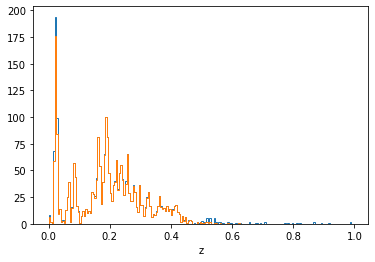

In [30]:
_    = pl.hist(one_tile['Z'], histtype='step', bins=np.arange(0.0, 1.0, 0.005))

isin = (one_tile['ZWARN'] == 0) & (one_tile['DELTACHI2'] > 40.)
_    = pl.hist(one_tile['Z'][isin], histtype='step', bins=np.arange(0.0, 1.0, 0.005))

pl.xlabel('z')

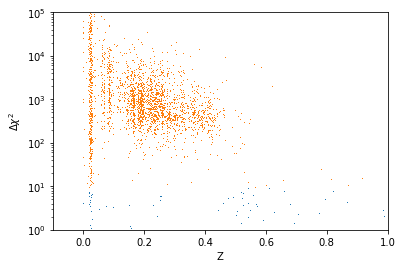

In [59]:
isin = (one_tile['ZWARN'] == 0)

pl.plot(one_tile['Z'],       one_tile['DELTACHI2'], marker=',', lw=0.0)
pl.plot(one_tile['Z'][isin], one_tile['DELTACHI2'][isin], marker=',', lw=0.0)

pl.xlabel('Z')
pl.ylabel(r'$\Delta \chi^2$')

pl.xlim(-0.1, 1.)
pl.ylim(1., 1.e5)

pl.yscale('log')

In [32]:
np.unique(one_tile['ZWARN'].data, return_counts=True)

(array([ 0,  4, 36]), array([2439,   94,    1]))

In [33]:
100. * 2439. / 2534

96.25098658247829

In [34]:
100. * 94. / 2534

3.7095501183898976

In [35]:
exp_table = Table.read('/global/cfs/cdirs/desi/spectro/redux/daily/exposure_tables/202104/exposure_table_20210405.csv')
exp_table = exp_table[exp_table['EXPID'] >= 83530]
exp_table

EXPID,EXPTIME,OBSTYPE,CAMWORD,TILEID,TARGTRA,TARGTDEC,NIGHT,PURPOSE,FA_SURV,SEQNUM,SEQTOT,PROGRAM,MJD-OBS,BADCAMWORD,BADAMPS,LASTSTEP,EXPFLAG,HEADERERR,COMMENTS
int64,float64,str7,str11,int64,float64,float64,int64,str13,str3,int64,int64,str29,float64,int64,int64,str6,str8,str1,str44
83530,881.7928,science,a0123456789,120,194.79335,28.31384,20210405,sv,sv3,1,1,bright,59310.19705736,--,--,all,aborted|,|,For EXPTIME: req=5400.0 but hdu=881.7928|
83532,457.9336,science,a0123456789,55,183.110929,0.11266,20210405,sv,sv3,1,1,dark,59310.212187903,--,--,all,aborted|,|,For EXPTIME: req=5400.0 but hdu=457.9336|
83533,547.2114,science,a0123456789,147,210.072171,5.09492,20210405,sv,sv3,1,1,bright,59310.221137591,--,--,all,aborted|,|,For EXPTIME: req=5400.0 but hdu=547.2114|
83535,378.2013,science,a0123456789,201,217.901021,34.49296,20210405,sv,sv3,1,1,bright,59310.234805512,--,--,all,aborted|,|,For EXPTIME: req=5400.0 but hdu=378.2013|
83536,304.0739,science,a0123456789,174,215.6286,52.60005,20210405,sv,sv3,1,1,bright,59310.244405731,--,--,all,aborted|,|,For EXPTIME: req=5400.0 but hdu=304.0739|
83537,672.9892,science,a0123456789,109,194.788458,28.31511,20210405,sv,sv3,1,1,dark,59310.252864774,--,--,all,aborted|,|,For EXPTIME: req=5400.0 but hdu=672.9892|
83539,1214.3304,science,a0123456789,136,210.066429,5.09744,20210405,sv,sv3,1,2,dark,59310.266090459,--,--,all,aborted|,|,For EXPTIME: req=1194.293 but hdu=1214.3304|
83540,1197.2576,science,a0123456789,136,210.06485,5.09804,20210405,sv,sv3,2,2,dark,59310.282468801,--,--,all,aborted|,|,For EXPTIME: req=1194.293 but hdu=1197.2576|
83541,620.4657,science,a0123456789,228,216.376429,-0.5107,20210405,sv,sv3,1,2,bright,59310.298901762,--,--,all,aborted|,|,For EXPTIME: req=614.412 but hdu=620.4657|


In [63]:
zslice = one_tile[(one_tile['Z'] > 0.029) & (one_tile['Z'] < 0.031)]
zslice['Z', 'TARGETID', 'LOCATION', 'RA', 'DEC', 'DELTACHI2', 'FIBER']

Z,TARGETID,LOCATION,RA,DEC,DELTACHI2,FIBER
float64,int64,int64,float64,float64,float64,int32
0.030238792279125515,39628422527322326,1280,194.1588058361733,27.21779400719889,453.68357675522566,654
0.029626726973075505,39628433260546544,1107,194.26770593760745,27.730051585433532,3470.7339336125297,641
0.02920337499843702,39628433277321914,9107,195.2742493514257,27.708878393116915,54.1264609892969,4679
0.030809479758509648,39628443960215211,8047,195.42045924887697,28.24903625522074,15984.016875445843,4125
0.030070603494957868,39628443960217337,8083,195.5492825749756,28.1756097295801,6266.076127320528,4344
0.030677948761486454,39628449278595162,7037,195.2931485786609,28.395328443619732,11.199337142170407,3981
0.029060626424433602,39628454588583604,6070,195.2930221172153,28.699740342937165,118.7568511320278,3418


In [55]:
np.unique(zslice['SPECTYPE'].data, return_counts=True)

(array([b'GALAXY'], dtype='|S6'), array([293]))

In [62]:
9107 // 1000

9

###### plot_spectra -i /global/cfs/cdirs/desi/spectro/redux/everest/tiles/cumulative/120/20210407/coadd-9-120-thru20210407.fits --rebin 8 -t 39628433277321914 --redrock /global/cfs/cdirs/desi/spectro/redux/everest/tiles/cumulative/120/20210407/redrock-9-120-thru20210407.fits

###### https://desidatamodel.readthedocs.io/en/latest/DESI_SPECTRO_DATA/NIGHT/EXPID/fibermap-EXPID.html?highlight=LOCATION 

###### https://data.desi.lbl.gov/desi/spectro/nightwatch/kpno/20210405/00083530/qa-summary-00083530.html

In [86]:
dat = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/everest/LSScats/test/BGS_ANYAlltiles_full.dat.fits')
dat

RA,DEC,REF_EPOCH,PARALLAX,PMRA,PMDEC,TARGETID,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,NUMOBS_MORE,NUMOBS,ZWARN_MTL,ZTILEID,TARGET_STATE,TIMESTAMP,VERSION,LOCATION,TILEID,TILELOCID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,FIBER,COADD_FIBERSTATUS,FIBERASSIGN_X,FIBERASSIGN_Y,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_PSF_TO_FIBER_SPECFLUX,TSNR2_ELG_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_ELG_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_ELG_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_ELG,TSNR2_LYA,TSNR2_BGS,TSNR2_QSO,TSNR2_LRG,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,RELEASE,BRICKID,BRICKNAME,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,NOBS_G,NOBS_R,NOBS_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,ALLMASK_G,ALLMASK_R,ALLMASK_Z,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,WISEMASK_W1,WISEMASK_W2,MASKBITS,PHOTSYS,NTILE,TILES,TILELOCIDS,LOCATION_ASSIGNED,TILELOCID_ASSIGNED,sort,COMP_TILE,rosette_number,rosette_r,FRACZ_TILELOCID,WEIGHT_ZFAIL
float64,float64,float32,float32,float32,float32,int64,int32,int64,int64,int64,int64,int64,int32,bytes30,bytes25,bytes14,int64,int64,int64,float64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,int32,float32,float32,int16,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int16,int32,bytes8,int32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,uint8,uint8,int16,bytes1,int64,bytes43,bytes143,bool,int64,float64,float64,float64,float64,float64,float64
186.61057216297232,61.714710982125084,0.0,0.0,0.0,0.0,39633407801559235,516,102000,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:06:17,0.57.0,3374,100,1003374,1e+20,1e+20 .. 1e+20,1e+20,1e+20,999999,999999,N/A,N/A,999999,1e+20,999999,999999,1e+20,1e+20,16959,1e+20,16959,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1152921504606846976,257,0,9011,622437,1865p617,2243,SER,0.01753175,6.7175236,14.104477,22.951761,231.87209,73.82909,24.421192,0.9494261,0.965645,0.9806355,2.8821654e-05,1.4283747e-05,3.798688e-05,0.0046099634,0.0040115826,0.007638155,0.999617,0.9995182,0.99988467,3,3,3,731.1993,234.01031,67.36527,528.1111,157.79251,42.53872,19.097834,12.123672,4.0204177,1.1605926,0.9970333,0.998177,0,0,0,2.5069814,5.2637944,8.565602,2.5069814,5.2637944,8.565602,0,0,0,N,1,100,1003374,False,1,1.0,0.40476190476190477,3.0,1.5587464400245565,0.5,1.0
191.14955067198017,60.34047183206205,0.0,0.0,0.0,0.0,39633390185480955,516,102000,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:06:17,0.57.0,9495,100,1009495,1e+20,1e+20 .. 1e+20,1e+20,1e+20,999999,999999,N/A,N/A,999999,1e+20,999999,999999,1e+20,1e+20,16959,1e+20,16959,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1152921504606846976,257,0,9011,618237,1912p602,763,DEV,0.013302865,3.1180577,12.051724,25.212042,343.522,88.892975,49.64499,0.9613861,0.9738223,0.9852719,1.3082532e-06,4.5848788e-07,1.2444472e-06,0.005351466,0.0040248847,0.009777258,0.9985893,0.99861467,0.9992128,3,3,3,684.4334,248.80429,

In [87]:
dat = dat[dat['TARGETID'] == 39628433277321914]
dat

RA,DEC,REF_EPOCH,PARALLAX,PMRA,PMDEC,TARGETID,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,NUMOBS_MORE,NUMOBS,ZWARN_MTL,ZTILEID,TARGET_STATE,TIMESTAMP,VERSION,LOCATION,TILEID,TILELOCID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,FIBER,COADD_FIBERSTATUS,FIBERASSIGN_X,FIBERASSIGN_Y,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_PSF_TO_FIBER_SPECFLUX,TSNR2_ELG_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_ELG_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_ELG_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_ELG,TSNR2_LYA,TSNR2_BGS,TSNR2_QSO,TSNR2_LRG,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,RELEASE,BRICKID,BRICKNAME,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,NOBS_G,NOBS_R,NOBS_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,ALLMASK_G,ALLMASK_R,ALLMASK_Z,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,WISEMASK_W1,WISEMASK_W2,MASKBITS,PHOTSYS,NTILE,TILES,TILELOCIDS,LOCATION_ASSIGNED,TILELOCID_ASSIGNED,sort,COMP_TILE,rosette_number,rosette_r,FRACZ_TILELOCID,WEIGHT_ZFAIL
float64,float64,float32,float32,float32,float32,int64,int32,int64,int64,int64,int64,int64,int32,bytes30,bytes25,bytes14,int64,int64,int64,float64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,int32,float32,float32,int16,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int16,int32,bytes8,int32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,uint8,uint8,int16,bytes1,int64,bytes43,bytes143,bool,int64,float64,float64,float64,float64,float64,float64
195.2742493514257,27.708878393116915,0.0,0.0,0.0,0.0,39628433277321914,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:05:51,0.57.0,9107,120,1209107,8227.563240556221,762.3443662311571 .. -3.8977035292891777,0.029203915718086414,4.268931587673058e-05,0,7926,GALAXY,,10,53.572724840429146,4679,0,-106.30084,-148.58156,2,1125.3512,2,0.0035,0.0049497476,-0.0005,0.0007071068,0.753636,0.039136577,34.783184,209.74182,1.0750047,0.3478212,6.686492,0.014674355,628.515,2.0307806,9.43415,24.711903,0.0,1173.559,5.2900324,11.491403,31.43753,34.79786,2011.8158,8.395818,21.273373,1152921504606846976,131074,0,9010,484994,1953p277,698,SER,0.008017715,45.024437,84.439674,128.44812,50.00956,14.924503,2.4267986,0.9765454,0.9841395,0.99109715,0.003204021,0.0031432284,0.004416525,0.016371213,0.016439978,0.037286174,0.9982984,0.99618363,0.9977278,3,3,3,1467.6998,443.1404,100.78477,955.33203,277.3455,52.406933,67.888596,35.36595,1.1774249,0.33191606,0.99864215,0.9991659,0,0,0,2.3687167,4.4423356,6.7576013,2.368722,4.442345,6.75762,0,0,0,S,9,120-121-122-123-124-126-127-128-129,1209107-1219071-1229058-1239104-1249046-1269117-1279062-1289067-1299091,True,1,2012.8157958984375,1.0,4.0,0.6750118636722577,1.0,1.0


In [85]:
redrock = fits.open('/global/cfs/cdirs/desi/spectro/redux/daily/tiles/120/20210405/zbest-9-120-20210405.fits')

zbest   = Table(redrock['ZBEST'].data)
fmap    = Table(redrock['FIBERMAP'].data)

zbest[zbest['TARGETID'] == 39628433277321914]

TARGETID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,NUMEXP,NUMTILE
int64,float64,float64,float64,float64,int64,int64,str6,str20,int64,float64,int32,int32
39628433277321914,8611.902273900807,-88.90477185976837 .. -136.07269382862617,0.4963228435502763,6.949428862624439e-05,0,7855,GALAXY,,10,10.151284970343113,0,1


In [84]:
redrock = fits.open('/global/cfs/cdirs/desi/spectro/redux/everest/tiles/perexp/120/00083530/redrock-9-120-exp00083530.fits')

zbest   = Table(redrock['REDSHIFTS'].data)
fmap    = Table(redrock['FIBERMAP'].data)

zbest[zbest['TARGETID'] == 39628433277321914]

TARGETID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2
int64,float64,float64,float64,float64,int64,int64,str6,str20,int64,float64
39628433277321914,8645.249098025262,-93.62099388179487 .. -136.65294949521254,0.4963275355385964,6.790305146416955e-05,4,7855,GALAXY,,10,8.299765057861805


In [88]:
redrock = fits.open('/global/cfs/cdirs/desi/spectro/redux/everest/tiles/cumulative/120/20210407/redrock-9-120-thru20210407.fits')

zbest   = Table(redrock['REDSHIFTS'].data)
fmap    = Table(redrock['FIBERMAP'].data)

zbest[zbest['TARGETID'] == 39628433277321914]

TARGETID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2
int64,float64,float64,float64,float64,int64,int64,str6,str20,int64,float64
39628433277321914,8227.563240556221,762.3443662311571 .. -3.8977035292891777,0.029203915718086414,4.268931587673058e-05,0,7926,GALAXY,,10,53.572724840429146


In [95]:
blah = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/everest/LSScats/test/BGS_ANYAlltiles_full.dat.fits')
blah

RA,DEC,REF_EPOCH,PARALLAX,PMRA,PMDEC,TARGETID,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,NUMOBS_MORE,NUMOBS,ZWARN_MTL,ZTILEID,TARGET_STATE,TIMESTAMP,VERSION,LOCATION,TILEID,TILELOCID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,FIBER,COADD_FIBERSTATUS,FIBERASSIGN_X,FIBERASSIGN_Y,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_PSF_TO_FIBER_SPECFLUX,TSNR2_ELG_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_ELG_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_ELG_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_ELG,TSNR2_LYA,TSNR2_BGS,TSNR2_QSO,TSNR2_LRG,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,RELEASE,BRICKID,BRICKNAME,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,NOBS_G,NOBS_R,NOBS_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,ALLMASK_G,ALLMASK_R,ALLMASK_Z,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,WISEMASK_W1,WISEMASK_W2,MASKBITS,PHOTSYS,NTILE,TILES,TILELOCIDS,LOCATION_ASSIGNED,TILELOCID_ASSIGNED,sort,COMP_TILE,rosette_number,rosette_r,FRACZ_TILELOCID,WEIGHT_ZFAIL
float64,float64,float32,float32,float32,float32,int64,int32,int64,int64,int64,int64,int64,int32,bytes30,bytes25,bytes14,int64,int64,int64,float64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,int32,float32,float32,int16,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int16,int32,bytes8,int32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,uint8,uint8,int16,bytes1,int64,bytes43,bytes143,bool,int64,float64,float64,float64,float64,float64,float64
186.61057216297232,61.714710982125084,0.0,0.0,0.0,0.0,39633407801559235,516,102000,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:06:17,0.57.0,3374,100,1003374,1e+20,1e+20 .. 1e+20,1e+20,1e+20,999999,999999,N/A,N/A,999999,1e+20,999999,999999,1e+20,1e+20,16959,1e+20,16959,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1152921504606846976,257,0,9011,622437,1865p617,2243,SER,0.01753175,6.7175236,14.104477,22.951761,231.87209,73.82909,24.421192,0.9494261,0.965645,0.9806355,2.8821654e-05,1.4283747e-05,3.798688e-05,0.0046099634,0.0040115826,0.007638155,0.999617,0.9995182,0.99988467,3,3,3,731.1993,234.01031,67.36527,528.1111,157.79251,42.53872,19.097834,12.123672,4.0204177,1.1605926,0.9970333,0.998177,0,0,0,2.5069814,5.2637944,8.565602,2.5069814,5.2637944,8.565602,0,0,0,N,1,100,1003374,False,1,1.0,0.40476190476190477,3.0,1.5587464400245565,0.5,1.0
191.14955067198017,60.34047183206205,0.0,0.0,0.0,0.0,39633390185480955,516,102000,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:06:17,0.57.0,9495,100,1009495,1e+20,1e+20 .. 1e+20,1e+20,1e+20,999999,999999,N/A,N/A,999999,1e+20,999999,999999,1e+20,1e+20,16959,1e+20,16959,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1152921504606846976,257,0,9011,618237,1912p602,763,DEV,0.013302865,3.1180577,12.051724,25.212042,343.522,88.892975,49.64499,0.9613861,0.9738223,0.9852719,1.3082532e-06,4.5848788e-07,1.2444472e-06,0.005351466,0.0040248847,0.009777258,0.9985893,0.99861467,0.9992128,3,3,3,684.4334,248.80429,

# Done.